# **TASK 2: To Explore Supervised Machine Learning**

---


This is a simple linear regression task as it involves just two variables. We will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 

In [98]:
#Importing needed packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.style as style
import seaborn as sns


In [99]:
style.use('seaborn-poster')
sns.set_style('darkgrid')

# **Understanding the data**


*   **Hours** : Number of hours studied
*   **Scores** : Percentage Score



In [100]:
#Getting the data
data = pd.read_csv('http://www.bitly.com/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Plotting Hours vs Scores, to see how linear is their relation

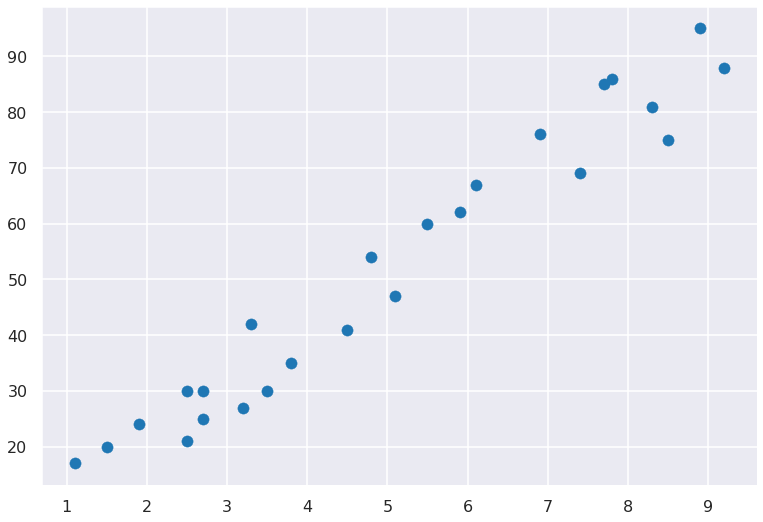

In [101]:
plt.scatter(data.Hours, data.Scores)
plt.show()

# **Train and Test dataset**


*   Train/Test Split involves splitting the dataset into training and testing sets respectively to provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.



In [102]:
#80% training set, 20% testing set
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [103]:
#Using sklearn package to model data
from sklearn import linear_model
regr = linear_model.LinearRegression()

Coefficient and Intercept in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, sklearn can estimate them directly from our data.

In [104]:
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.98754768]]
Intercept:  [2.01369363]


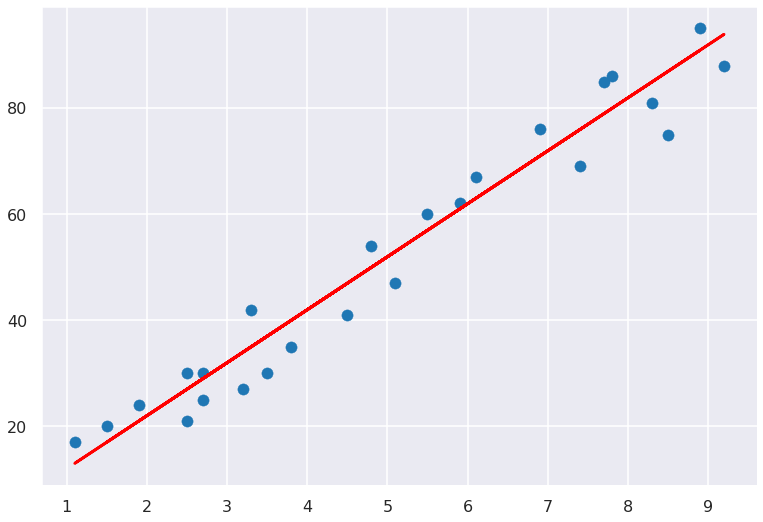

In [105]:
plt.scatter(data.Hours, data.Scores)
#Plotting best fit line over the data
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.show()

# **Evaluation**

> - Mean absolute error: It is the mean of the absolute value of the errors.
- Mean Squared Error (MSE): It) is the mean of the squared error. It is geared more towards large errors due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- R-squared represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0.



In [106]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(train[['Hours']])
test_y = np.asanyarray(train[['Scores']])
test_y_1 = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_1 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_1 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_1 , test_y) )

Mean absolute error: 4.86
Residual sum of squares (MSE): 26.85
R2-score: 0.96


# **Making Predictions**


*   What will be predicted score if a student studies for 9.25 hours in a day?



In [107]:
Test_hours = np.array([9.25,9.5,9.75,9.90])
Test_hours = Test_hours.reshape(-1,1)
Pred_Scores = regr.predict(Test_hours)

print('Hours\tPredicted Score')
for h,s in zip(Test_hours,Pred_Scores):
  print('{}\t{}'.format(h,s))

Hours	Predicted Score
[9.25]	[94.39850965]
[9.5]	[96.89539657]
[9.75]	[99.39228349]
[9.9]	[100.89041564]
